In [1]:
import numpy as np
import pandas as pd
import functions as fn
from statsmodels.tsa.statespace import sarimax as sa
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace import sarimax as sa
import math
import pickle as pl
%matplotlib inline

/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


#### Reading data sets
Reading the original and additional stores data sets that were created in Restaurant_Prediction notebook. I also show the plot of total visitors as a function of date for original visitors.

In [2]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
Totalvisitors_orgnal_stores = pd.read_csv('Totalvisitors_orgnal_stores.csv', parse_dates=['visit_date'],\
                 date_parser=dateparse)
Totalvisitors_add_stores = pd.read_csv('Totalvisitors_add_stores.csv', parse_dates=['visit_date'],\
                 date_parser=dateparse)

list(Totalvisitors_add_stores)
Totalvisitors_add_stores.drop(columns='Unnamed: 0', inplace=True)
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
holiday_dates = pd.read_csv('holiday_dates.csv', header=None)
holiday_dates.columns = ['0', 'holidays']


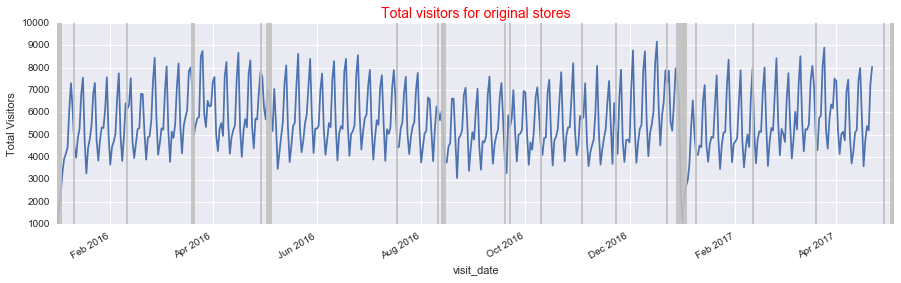

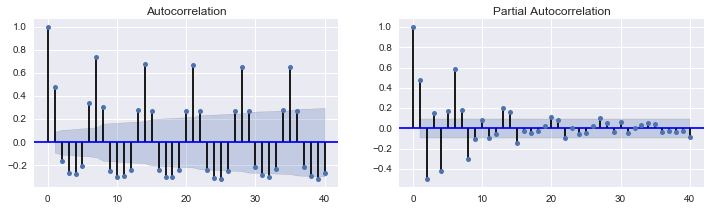

In [3]:
fn.totvstors_date_hol(Totalvisitors_orgnal_stores, holiday_dates.holidays,  \
'Total visitors for original stores')
fn.ACF(Totalvisitors_orgnal_stores.visitors)

#### Training the Arima model
We need to determine the non-seasonal(pdq) and seasonal order(PDQ). In this notebook, I will work with the original and additional stores time series. We need to find pdq and PDQ in such a way that AIC and BIC are minimum, ie, we penalize models that are complex. We also have to see that the residuals (after fitting a particular model) are not serially correlated. Thus, the residuals should be normally distributed and the correlogram of residuals should not have significant peaks. 

As shown below, we find (2, 1, 1)x(0, 1, 1, 7) model for original stores time series and 
(2, 1, 1)x(0, 1, 2, 7) model for additional stores time series. We find that for these pdqs, AIC is minimum compared to all other pdqs in the list. Notice that the correlogram of residuals does not contain any statistically significant peaks for both the cases. Also, the residuals are normally distributed in both the cases. The p-values for all the coefficients is also zero. All these factors are indicating that our optimized pdqs indeed represent the best possible model. 

The question then is how did I decide the pdqs in the following list. After examining ACF and PACF, initially I tried only lower order pdqs [(1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1,1), (1,1,1), (1,0,2)], similarly lower order for PDQs. However, for the minimum AIC case, I found that there was a statistically significant peak at lag=9. I tried a few ways to remove this statistically significant peak at lag=9. I describe some methods that I tried at the bottom of this notebook.

In [4]:
pdq = [(1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1,1), (1,1,1), (1,0,2), (1,0,3), \
       (2,0,2), (2,1,1)]
PDQ = [(1,0,0,7), (0,0,1,7), (1,0,1,7), (0,1,1,7), (1,1,1,7), (2,0,1,7), (0,1,2,7), \
       (0,1,3,7), (1,0,0,0), (0,0,1,0), (1,0,1,0),  (0,1,1,0),  (1,1,1,0),  (2,0,1,0), \
       (0,1,2,0), (2,0,2,7), (2,0,2,0)]

Totalvisitors_orgnal_stores.set_index('visit_date', inplace=True)
Totalvisitors_add_stores.set_index('visit_date', inplace=True)

In [6]:
arima_orgnal_stores = fn.arima(Totalvisitors_orgnal_stores.visitors, pdq, PDQ)
arima_add_stores = fn.arima(Totalvisitors_add_stores.visitors, pdq, PDQ)

/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages

                                 Statespace Model Results                                
Dep. Variable:                          visitors   No. Observations:                  478
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 7)   Log Likelihood               -3678.275
Date:                           Mon, 25 Jun 2018   AIC                           7366.550
Time:                                   17:24:30   BIC                           7387.398
Sample:                               01-01-2016   HQIC                          7374.746
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5478      0.058      9.438      0.000       0.434       0.662
ar.L2         -0.2245      0.051     -4.427

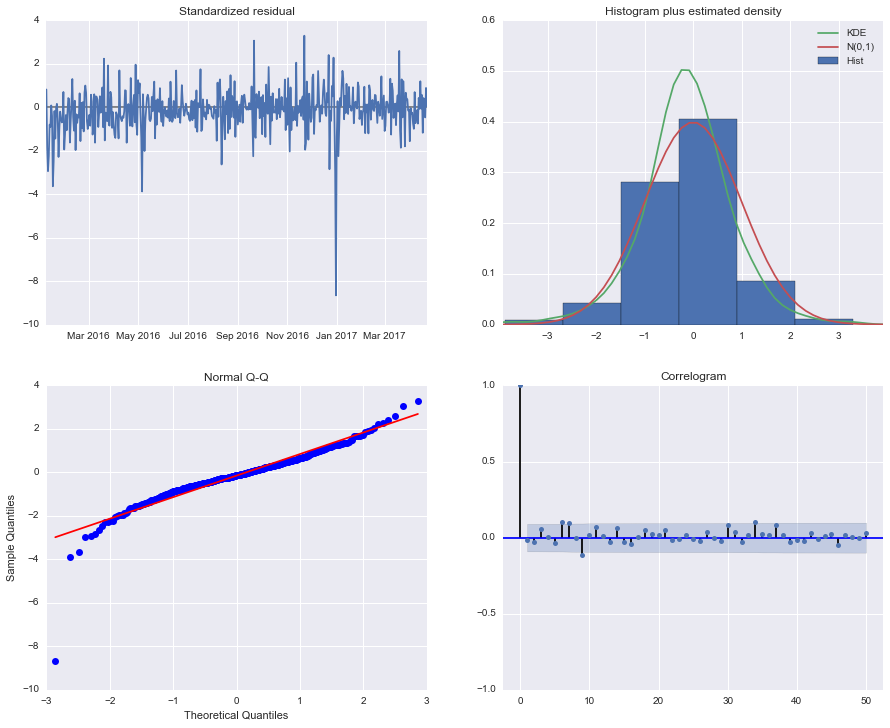

                                 Statespace Model Results                                
Dep. Variable:                          visitors   No. Observations:                  296
Model:             SARIMAX(2, 1, 1)x(0, 1, 2, 7)   Log Likelihood               -2383.087
Date:                           Mon, 25 Jun 2018   AIC                           4778.175
Time:                                   17:24:31   BIC                           4800.317
Sample:                               07-01-2016   HQIC                          4787.040
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6917      0.043     15.986      0.000       0.607       0.777
ar.L2         -0.1109      0.044     -2.517

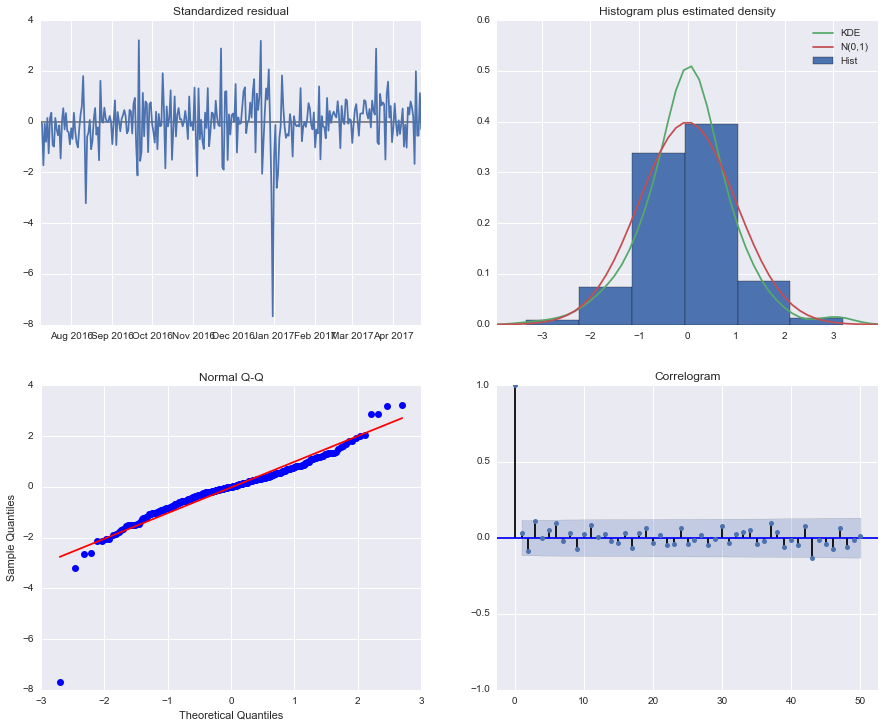

In [7]:
print arima_orgnal_stores[0].summary()
arima_orgnal_stores[0].plot_diagnostics(lags=50,figsize=(15, 12))
plt.show()

print arima_add_stores[0].summary()
arima_add_stores[0].plot_diagnostics(lags=50,figsize=(15, 12))
plt.show()

## Forcasting

Following are the optimized models obtained for two time series:
- (2, 1, 1)x(0, 1, 1, 7) model for original stores
- (2, 1, 1)x(0, 1, 2, 7) model for additional stores

Based on these models, we will do the static forecast for the time period April 23 to May 31, 2017. 

In [10]:
pred_orgnal_stores = arima_orgnal_stores[0].get_prediction(start=pd.to_datetime('2017-01-05'), \
                              end=pd.to_datetime('2017-05-31'))
pred_ci_orgnal_stores = pred_orgnal_stores.conf_int()

pred_add_stores = arima_add_stores[0].get_prediction(start=pd.to_datetime('2017-01-05'), \
                              end=pd.to_datetime('2017-05-31'))
pred_ci_add_stores = pred_add_stores.conf_int()

prediction_orgnal_stores = pd.Series(pred_orgnal_stores.predicted_mean)
prediction_add_stores    = pd.Series(pred_add_stores.predicted_mean)

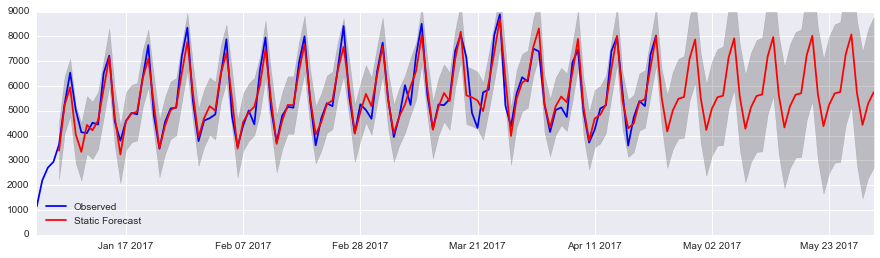

In [13]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(Totalvisitors_orgnal_stores.visitors.index, Totalvisitors_orgnal_stores.visitors, \
         'b-', label = 'Observed')
ax.plot(prediction_orgnal_stores.index, prediction_orgnal_stores, 'r-', \
        label = 'Static Forecast')
ax.fill_between(pred_ci_orgnal_stores.index,
                pred_ci_orgnal_stores.iloc[:, 0],
                pred_ci_orgnal_stores.iloc[:, 1], color='k', alpha=.2)
plt.xlim('2017-01-01', '2017-05-31')
plt.ylim(0, 9000)
legend = ax.legend(loc = 'lower left', shadow = True)
plt.show()

#### Evaluating fitted model
We will evaluate the fitted model by following measures.
- Mean Absolute Percentage Error (MAPE)
- Root Mean Square Error (RMSE)
- Mean Absolute Error (MAE)

I find that mean absolute percentage error for both time series is around 6%, which suggests that the predicted model is doing very well predicting the future total visitors for these time series. 

Similarly, I will find the model parameters for all the following time series:
Totvstor_by_genre           
Totvstor_by_genre_orgnal_stores 
Totvstor_by_genre_add_stores    
Totvstor_by_area              
Totvstor_by_area_orgnal_stores 
Totvstor_by_area_add_stores    

Once we have the prediction for total visitors in the April-May (2017) months for these series, we can predict the distribution of visitors by genre and area based on the distribution of visitors in train set. 

In [16]:
y_forecasted_orgnal_stores = pred_orgnal_stores.predicted_mean['2017-04-01':'2017-04-22']
y_truth_orgnal_stores = Totalvisitors_orgnal_stores.visitors['2017-04-01':'2017-04-22']

y_forecasted_add_stores = pred_add_stores.predicted_mean['2017-04-01':'2017-04-22']
y_truth_add_stores = Totalvisitors_add_stores.visitors['2017-04-01':'2017-04-22']

values_orgnal_stores = fn.evaluation_metric(y_truth_orgnal_stores, y_forecasted_orgnal_stores)
print values_orgnal_stores

values_add_stores = fn.evaluation_metric(y_truth_add_stores, y_forecasted_add_stores)
print values_add_stores

{'MAPE error': 5.85, 'RMSE error': 405.57, 'MAE error': 319.21}
{'MAPE error': 6.26, 'RMSE error': 711.34, 'MAE error': 552.0}


#### Procedure to decide the list of pdqs
Coming back to the question of how to decide the order parameters for time series. As mentioned above, I initially tried lower order parameter list. I obtained (1,0,2)x(0,1,1,7) as the model parameters corresponding to minimum AIC. However, we can see below that the residuals of this model have a statistically significant peak at lag=9. Since there is weekly periodicity, I took the difference of visitors at time t and at time t-7. We can see from the plot below that visitor series looks quite random after taking the difference. ACF and PACF also do not show any periodic structures. After fitting the same model, ie, (1,0,2)x(0,1,1,7) on the difference series, I find that the correlogram of residuals now has peaks at lags=6 and 7, the peak at lag=9 has disappeared. All the steps in my trial and error experiment are show below. 

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 2)x(0, 1, 1, 7)   Log Likelihood               -3679.522
Date:                           Tue, 26 Jun 2018   AIC                           7369.044
Time:                                   11:03:22   BIC                           7389.892
Sample:                                        0   HQIC                          7377.240
                                           - 478                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.002    426.889      0.000       0.995       1.005
ma.L1         -0.2345      0.035     -6.776

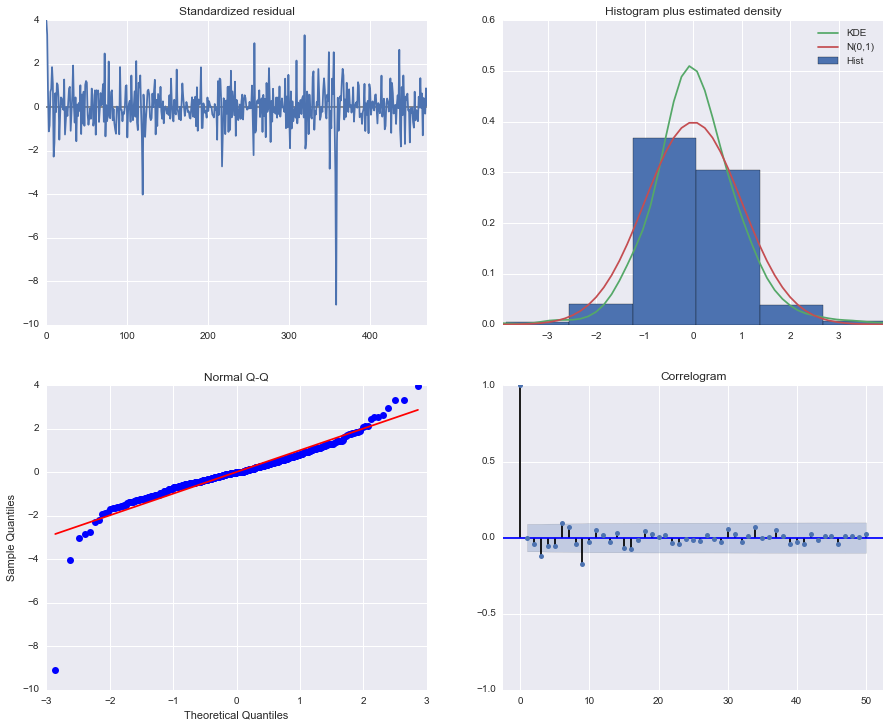

In [26]:
mod1 = sa.SARIMAX(Totalvisitors_orgnal_stores.visitors.values, order=(1, 0, 2), \
                 seasonal_order=(0, 1, 1, 7), enforce_invertibility=True)
results1 = mod1.fit()
print results1.summary()
results1.plot_diagnostics(lags=50,figsize=(15, 12))
plt.show()


mean1=71.510638, mean2=9.029661
variance1=777855.934715, variance2=1017442.445925
ADF Statistic: -6.463470
p-value: 0.000000
Critical Values:
	5%: -2.868
	1%: -3.445
	10%: -2.570


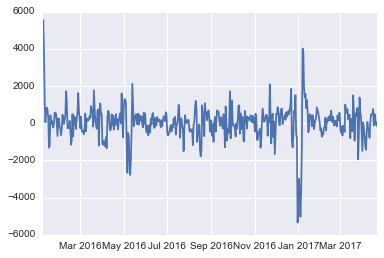

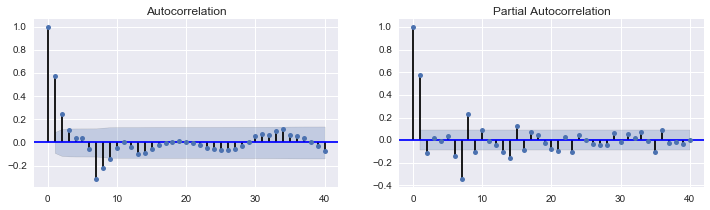

In [19]:
TV_orgnal_stores_diff7 = (Totalvisitors_orgnal_stores.visitors-Totalvisitors_orgnal_stores.visitors.shift(7)).dropna()
plt.plot(TV_orgnal_stores_diff7)

fn.ACF(TV_orgnal_stores_diff7)
fn.ADF(TV_orgnal_stores_diff7)

                                 Statespace Model Results                                
Dep. Variable:                                 y   No. Observations:                  471
Model:             SARIMAX(1, 0, 2)x(0, 1, 1, 7)   Log Likelihood               -3746.538
Date:                           Tue, 26 Jun 2018   AIC                           7503.077
Time:                                   10:42:13   BIC                           7523.851
Sample:                                        0   HQIC                          7511.249
                                           - 471                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4636      0.087      5.330      0.000       0.293       0.634
ma.L1          0.1753      0.100      1.756

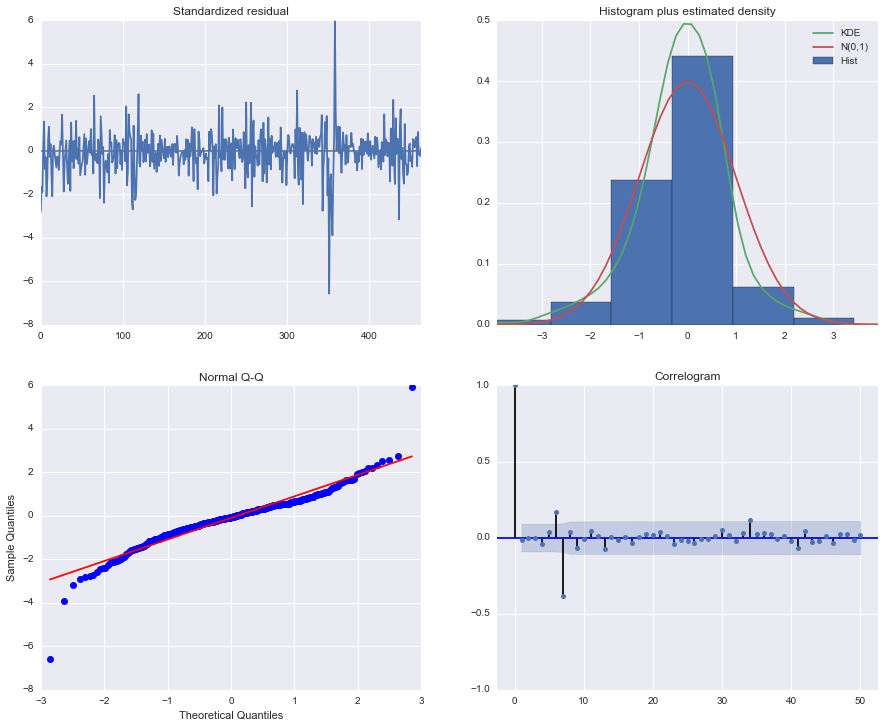

In [20]:
mod1 = sa.SARIMAX(TV_orgnal_stores_diff7.values, order=(1, 0, 2), \
                 seasonal_order=(0, 1, 1, 7), enforce_invertibility=False)
results1 = mod1.fit()
print results1.summary()
results1.plot_diagnostics(lags=50,figsize=(15, 12))
plt.show()


                                 Statespace Model Results                                
Dep. Variable:                          visitors   No. Observations:                  478
Model:             SARIMAX(1, 1, 2)x(0, 1, 1, 9)   Log Likelihood               -3939.821
Date:                           Tue, 26 Jun 2018   AIC                           7889.643
Time:                                   11:14:22   BIC                           7910.491
Sample:                               01-01-2016   HQIC                          7897.839
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1639      0.055      2.995      0.003       0.057       0.271
ma.L1         -0.2421      0.039     -6.259

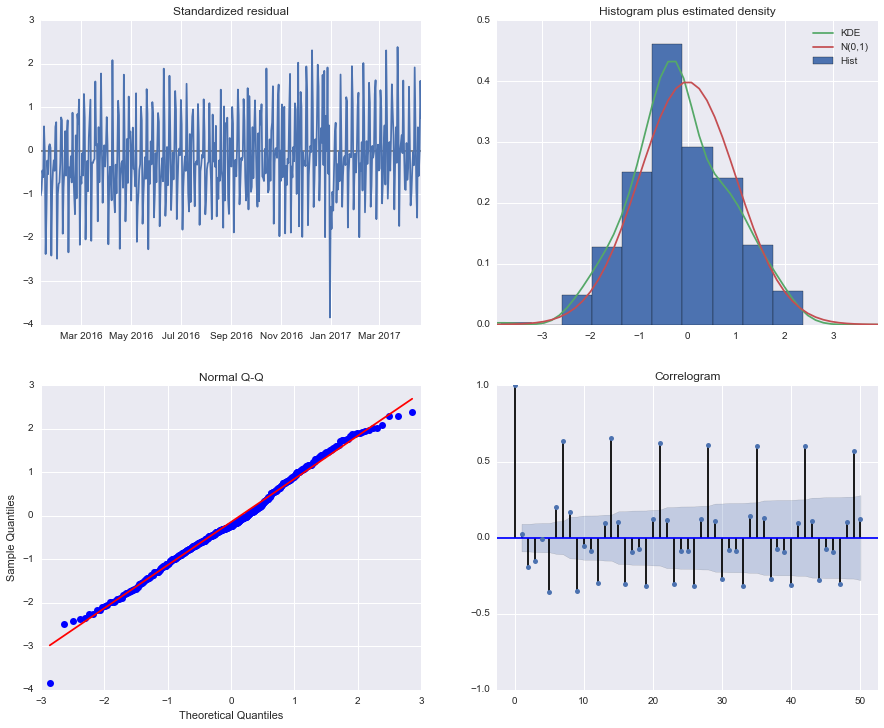

In [28]:
mod1 = sa.SARIMAX(Totalvisitors_orgnal_stores.visitors, order=(1, 1, 2), \
                 seasonal_order=(0, 1, 1, 9), enforce_invertibility=False)
results1 = mod1.fit()
print results1.summary()
results1.plot_diagnostics(lags=50,figsize=(15, 12))
plt.show()

In [29]:
pdq = [(1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1,1), (1,1,1), (1,0,2), (1,0,3), \
       (2,0,2)]
PDQ = [(1,0,0,9), (0,0,1,9), (1,0,1,9), (0,1,1,9), (1,1,1,9), (2,0,1,9), (0,1,2,9), \
       (0,1,3,9), (1,0,0,0), (0,0,1,0), (1,0,1,0),  (0,1,1,0),  (1,1,1,0),  (2,0,1,0), \
       (0,1,2,0), (2,0,2,9), (2,0,2,0)]

pdq1 = [(2,0,2)]
PDQ1 = [(2,0,2,0)]

In [30]:
arima_output_diff = fn.arima(TV_orgnal_stores_diff7, pdq, PDQ) 

/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/tsa/statespace/tools.py:405: RuntimeWarning: invalid value encountered in sqrt
  x = r / ((1 - r**2)**0.5)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWa

                                 Statespace Model Results                                
Dep. Variable:                          visitors   No. Observations:                  471
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 9)   Log Likelihood               -3728.584
Date:                           Thu, 28 Jun 2018   AIC                           7465.169
Time:                                   16:46:02   BIC                           7481.788
Sample:                               01-08-2016   HQIC                          7471.706
                                    - 04-22-2017                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6004      0.030     20.076      0.000       0.542       0.659
ma.L1         -1.0000      0.039    -25.605

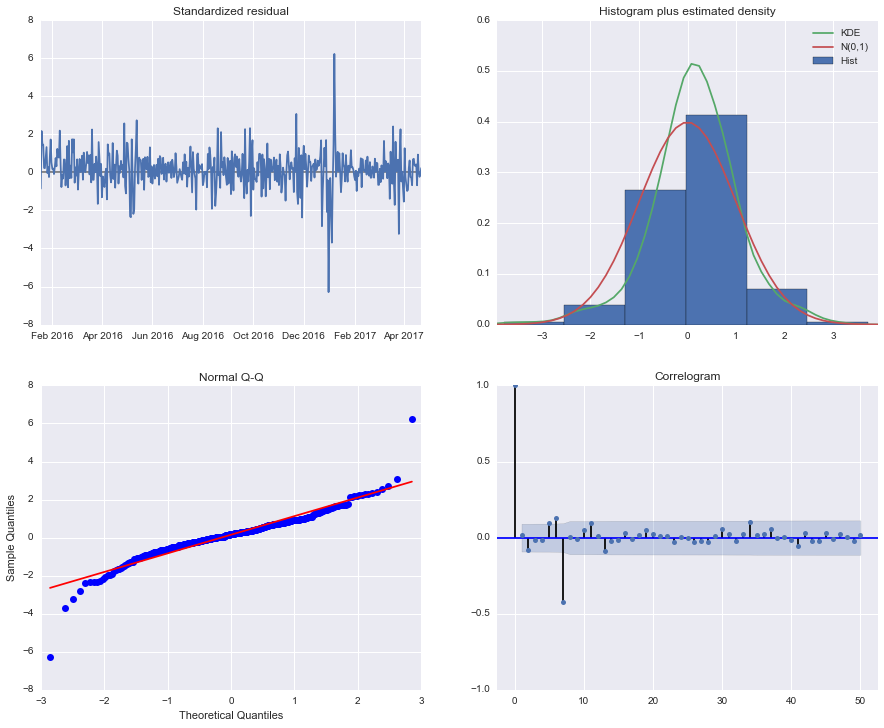

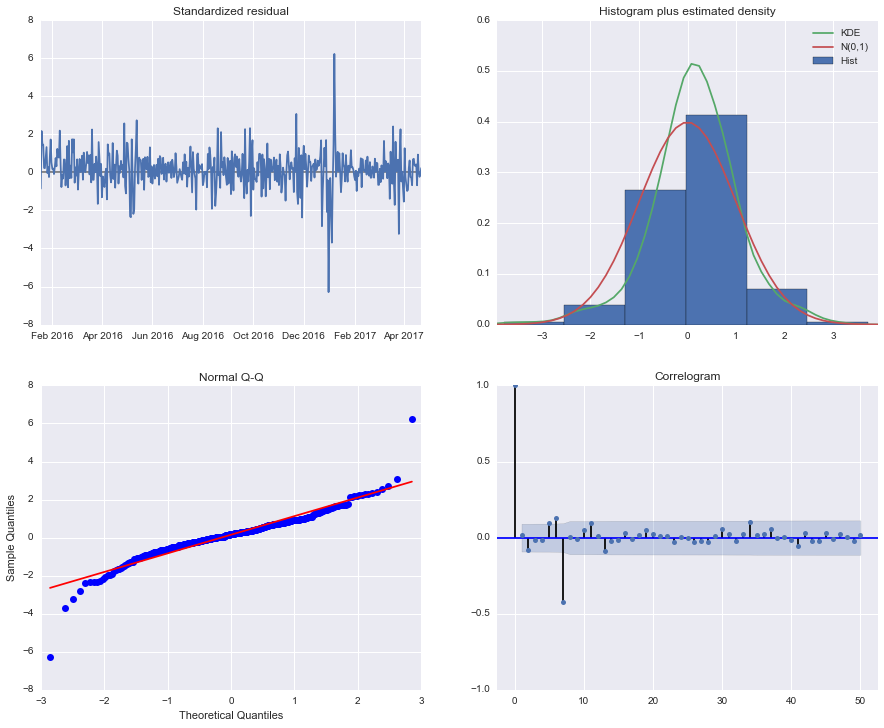

In [31]:
print arima_output_diff[0].summary()
arima_output_diff[0].plot_diagnostics(lags=50,figsize=(15, 12))


In [32]:
s=7
pdq = [(1,0,0), (0,1,0), (0,0,1), (1,1,0), (1,0,1), (0,1,1), (1,1,1), (1,0,2), (1,0,3), \
       (2,0,2)]
PDQ = [(1,0,0,s), (0,0,1,s), (1,0,1,s), (0,1,1,s), (1,1,1,s), (2,0,1,s), (0,1,2,s), \
       (0,1,3,s), (1,0,0,0), (0,0,1,0), (1,0,1,0),  (0,1,1,0),  (1,1,1,0),  (2,0,1,0), \
       (0,1,2,0), (2,0,2,s), (2,0,2,0)]

In [33]:
arima_output_diff7 = fn.arima(TV_orgnal_stores_diff7, pdq, PDQ)


/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/pushparaghani/anaconda64/anaconda/lib/python2.7/site-packages

In [ ]:
print arima_output_diff7[0].summary()
arima_output_diff7[0].plot_diagnostics(lags=50,figsize=(15, 12))

In [ ]:
pdq, PDQ = [(2,1,1)], [(1,0,1,7)]
arima_output_diff71 = fn.arima(TV_orgnal_stores_diff7, pdq, PDQ)

In [ ]:
print arima_output_diff71[0].summary()
arima_output_diff71[0].plot_diagnostics(lags=50,figsize=(15, 12))

In [ ]:
pdq, PDQ = [(2,1,1)], [(0,0,1,7)]
arima_output_diff72 = fn.arima(TV_orgnal_stores_diff7, pdq, PDQ)
print arima_output_diff72[0].summary()
arima_output_diff72[0].plot_diagnostics(lags=50,figsize=(15, 12))

In [ ]:
pdq, PDQ = [(2,1,1)], [(0,0,1,7)]
arima_output_diff73 = fn.arima(TV_orgnal_stores_diff7, pdq, PDQ)
print arima_output_diff73[0].summary()
arima_output_diff73[0].plot_diagnostics(lags=50,figsize=(15, 12))

In [ ]:
mod1 = sa.SARIMAX(Totalvisitors_orgnal_stores.visitors.values, order=(2, 1, 1), \
                 seasonal_order=(0, 1, 1, 7), enforce_invertibility=False)
results1 = mod1.fit()
print results1.summary()
results1.plot_diagnostics(lags=50,figsize=(15, 12))
plt.show()

In [ ]:
mod = sa.SARIMAX(TV_orgnal_stores_diff7, order=(2,0,2), seasonal_order=(2,0,2,0))


In [ ]:
results = mod.fit()

In [ ]:
results.summary()

In [ ]:
arimaDF_diff = pd.DataFrame(arima_output_diff)
arimaDF_diff

In [ ]:
arimaDF_diff.loc[arimaDF['AIC'].idxmin()]

In [ ]:
mod1 = sa.SARIMAX(TV_orgnal_stores_diff7, order=(0, 1, 1), seasonal_order=(2, 0, 1, 0))
results1 = mod1.fit()
results1.summary()

In [ ]:
results1.plot_diagnostics(figsize=(15, 12))
plt.show()